# Import
- https://towardsdatascience.com/clustering-made-easy-with-pycaret-656316c0b080

In [1]:
!pip install --user --upgrade tables
!pip install --user pycaret

In [2]:
# !pip install pycaret[full]==2.3.4
!pip install pycaret

In [3]:
# Install or upgrade required libraries
!pip install pandas scikit-learn

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.clustering import *
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [6]:
csv_file_path = '/content/drive/MyDrive/MS thesis/HFCAI/CALABARZON/calabarzon_HCFAI_sum.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)
df.sort_values(by='HCFAI', ascending=False).head(2)

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,POI_Presence,Nearest_RHU,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you,HCFAI
2633,3029964,Santa Inez,Tanay,Rizal,0.189871,1.127687,0.688586,1.0,0,1,1,3016155,22.808192,2.169909,0.994371,17.093573,8.385755,4.190865,3.240776,0.657646
2636,3029967,Santa Inez,Tanay,Rizal,0.189871,1.127687,0.688586,1.0,0,1,1,3016155,18.998063,8.369649,3.835431,65.932353,32.345055,16.164765,12.500136,0.657646


In [7]:
for i in df.columns:
  print(i)

ID
barangay_name
city_name
province_name
flood_probability_value
rain intensity_value
drought_value
buildability_landcov
RHU_Presence
Road_Presence
POI_Presence
Nearest_RHU
Distance_to_Nearest_RHU_km
popden_chi
popden_eld
popden_all
popden_wom
popden_w_1
popden_you
HCFAI


# K-means on HCFAI

In [8]:
IDonly = df['ID']
IDdf = IDonly.to_frame()
IDdf

,ID
0,2941561
1,2942942
2,2942943
3,2949831
4,2951212
...,...
7503,3180648
7504,3180649
7505,3182031
7506,3182032


In [9]:
HCIdf = df[['HCFAI']]
# HCIdf = HCIdf.to_frame()
cluster = setup(HCIdf, session_id = 7652)

,Description,Value
0,Session id,7652
1,Original data shape,"(7508, 1)"
2,Transformed data shape,"(7508, 1)"
3,Numeric features,1
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


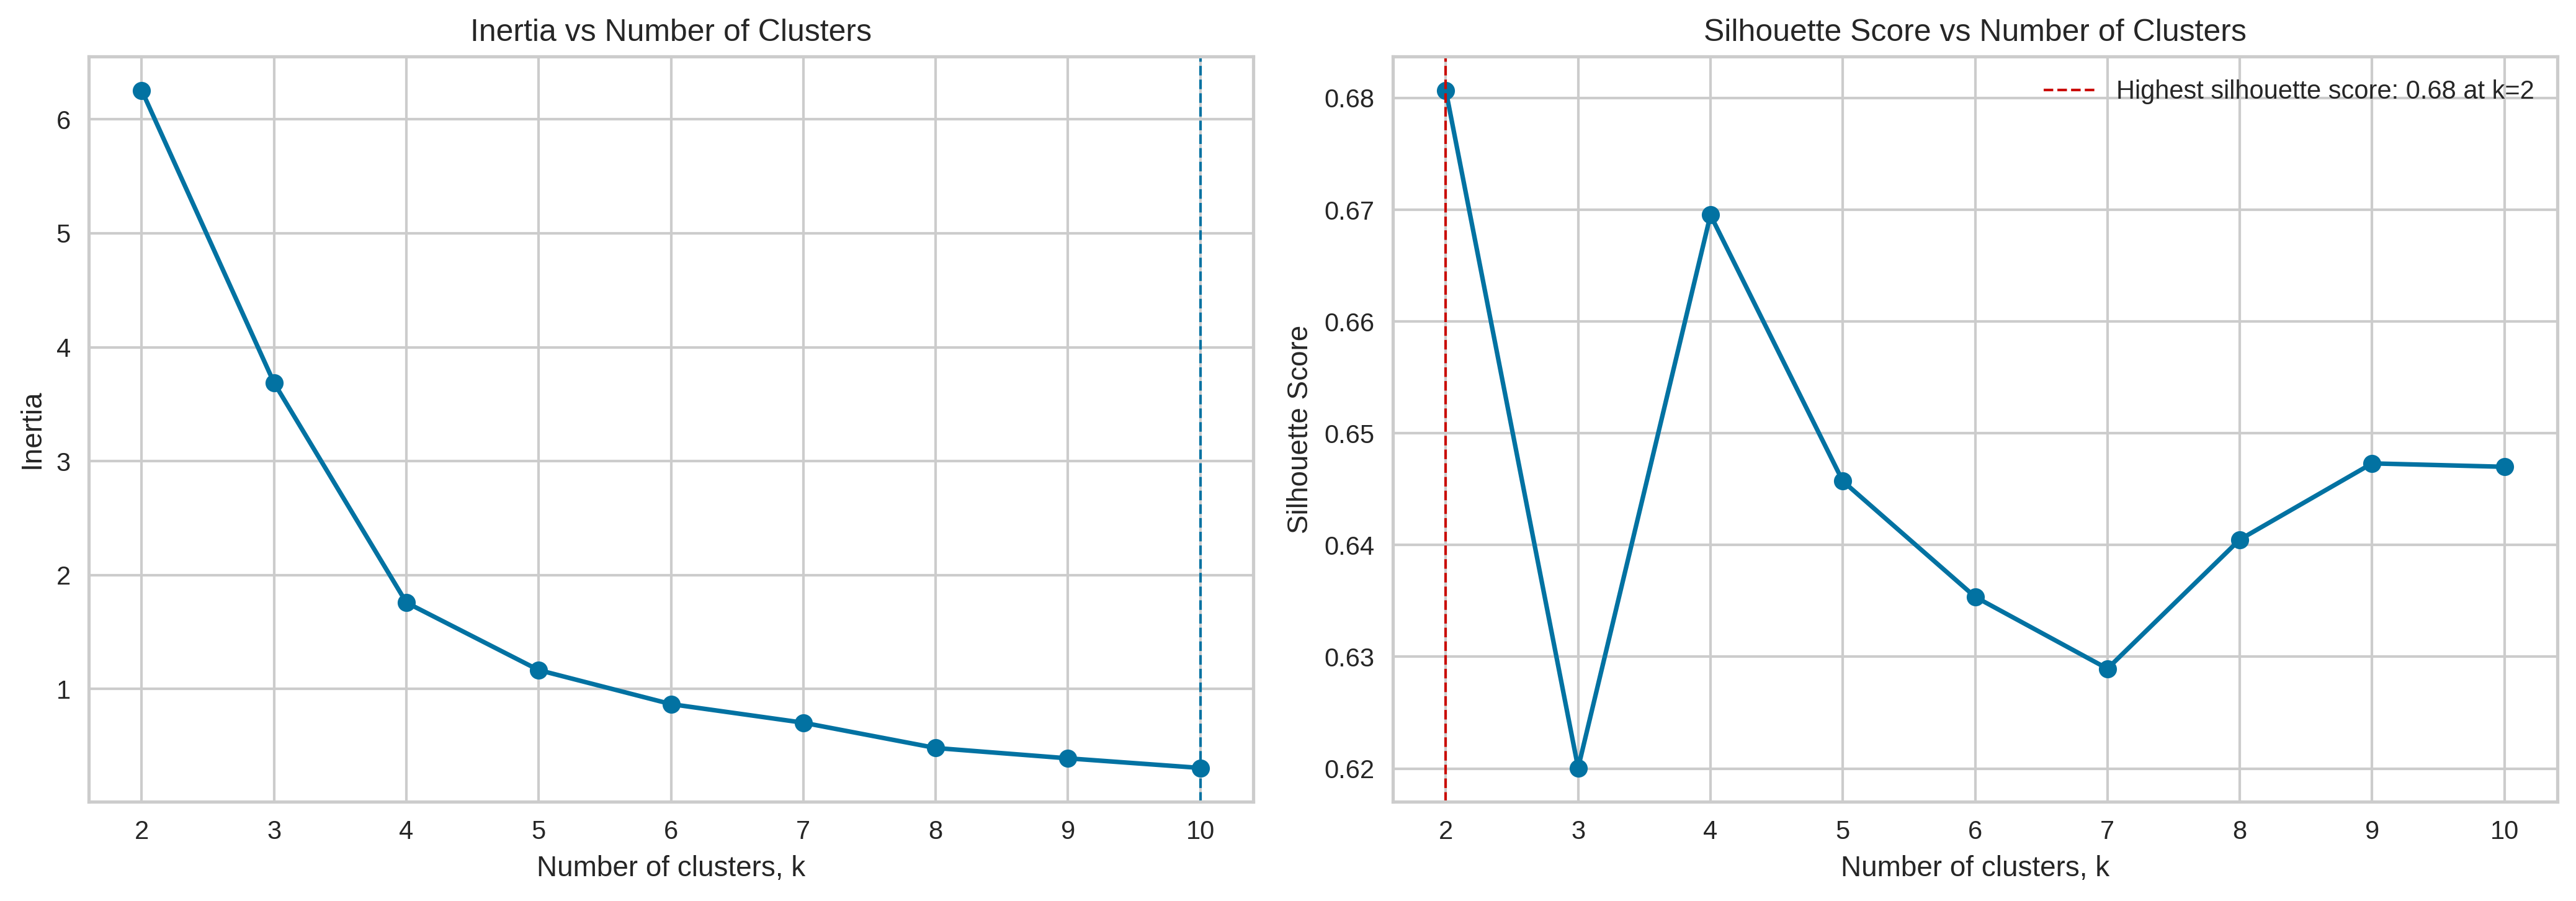

In [15]:
# Initialize lists to store inertia and silhouette scores
k_values = range(2, 11)
inertia_values = []
silhouette_scores = []

for k in k_values:
    # Create KMeans model
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(HCIdf)

    # Calculate inertia
    inertia = kmeans.inertia_
    inertia_values.append(inertia)

    # Calculate silhouette score
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(HCIdf, labels)
    silhouette_scores.append(silhouette_avg)

max_silhouette_score = max(silhouette_scores)
min_intertia_score = min(inertia_values)
max_silhouette_k = k_values[silhouette_scores.index(max_silhouette_score)]
min_intertia_k = k_values[inertia_values.index(min_intertia_score)]

# Plot the results
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
plt.axvline(x=min_intertia_k, color='b', linestyle='--', linewidth=1, label=f'Lowest intertia score: {min_intertia_k:.2f} at k={min_intertia_k}')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.axvline(x=max_silhouette_k, color='r', linestyle='--', linewidth=1, label=f'Highest silhouette score: {max_silhouette_score:.2f} at k={max_silhouette_k}')
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
model = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6695,32760.2064,0.4569,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

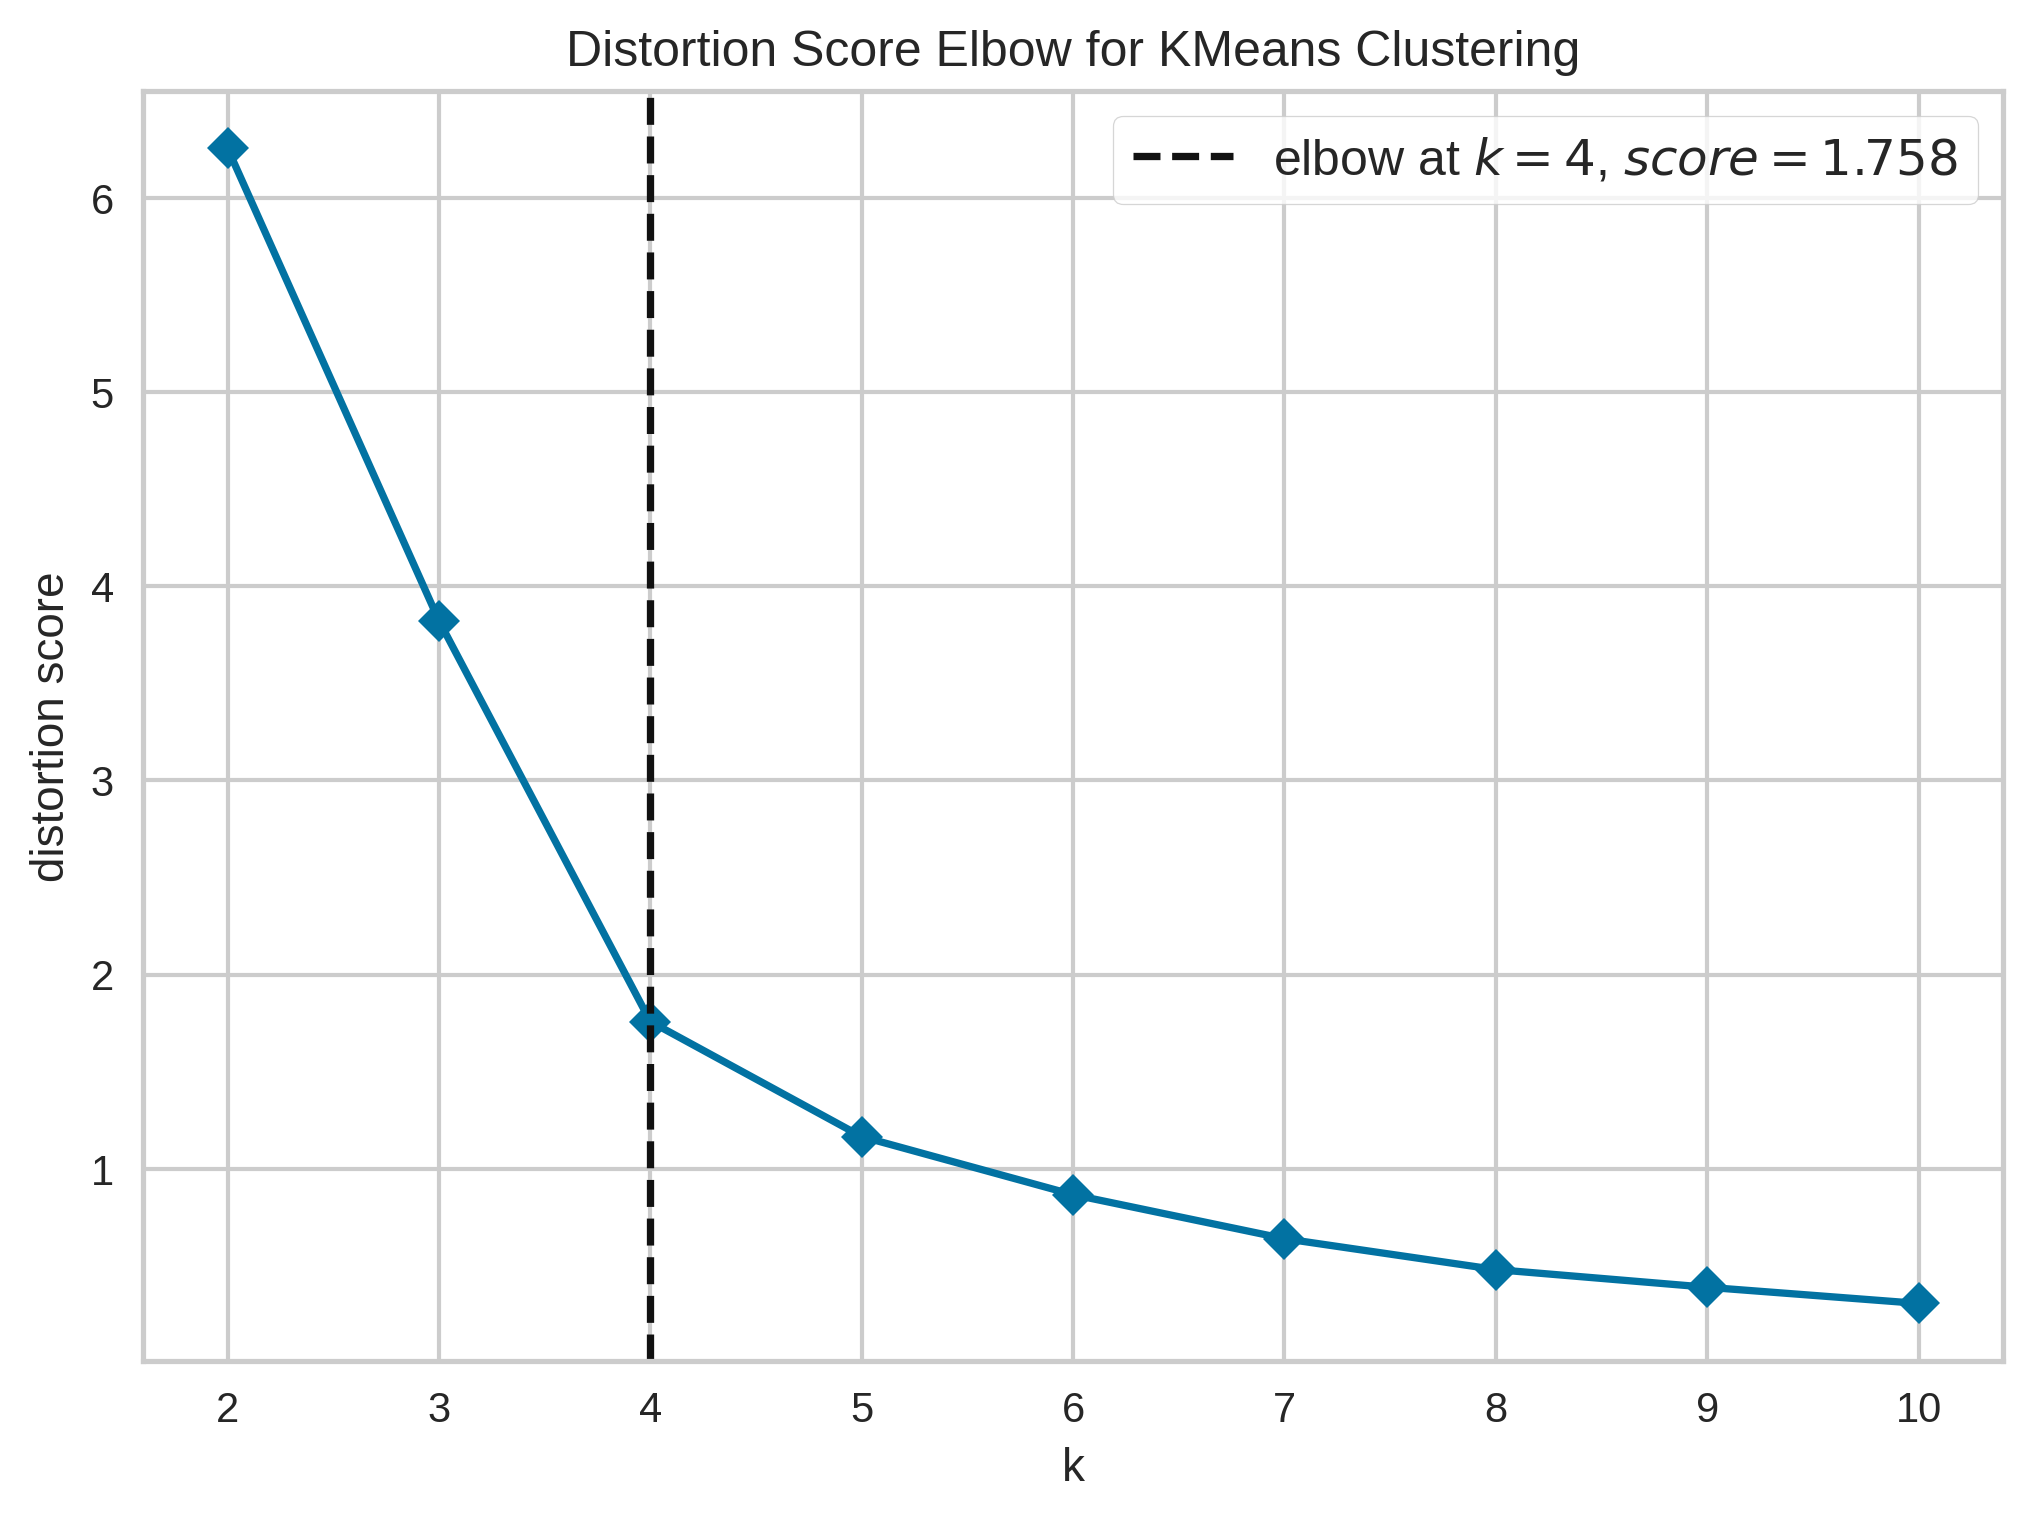

In [12]:
plot_model(model, 'elbow')

### K-means clustering model validation:
1. Intertia score
2. Silhouette score

```
Refer to comments from panel
```



In [13]:
# Evaluate the model
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Apply model on data

In [16]:
model = create_model('kmeans', num_clusters = 2)
plot_model(model,  plot = 'distribution')
# plot_model(model, 'cluster')
save_model(model, '/content/drive/MyDrive/MS thesis/preliminary site selection/CALABARZON/CALABARZON-HCFAI-Clusters-silhouette')
HCFAIdf_results = assign_model(model)
HCFAIdf_results.head(10)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6806,22243.1476,0.4116,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


,HCFAI,Cluster
0,0.500000,Cluster 1
1,0.435149,Cluster 0
2,0.392740,Cluster 0
3,0.522488,Cluster 1
4,0.569120,Cluster 1
5,0.605581,Cluster 1
6,0.500000,Cluster 1
7,0.500000,Cluster 1
8,0.519623,Cluster 1
9,0.393930,Cluster 0


In [17]:
model = create_model('kmeans', num_clusters = 4)
plot_model(model,  plot = 'distribution')
# plot_model(model, 'cluster')
save_model(model, '/content/drive/MyDrive/MS thesis/preliminary site selection/CALABARZON/CALABARZON-HCFAI-Clusters-inertia')
HCFAIdf_results = assign_model(model)
HCFAIdf_results.head(10)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6695,32760.2064,0.4569,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


,HCFAI,Cluster
0,0.500000,Cluster 1
1,0.435149,Cluster 0
2,0.392740,Cluster 3
3,0.522488,Cluster 1
4,0.569120,Cluster 2
5,0.605581,Cluster 2
6,0.500000,Cluster 1
7,0.500000,Cluster 1
8,0.519623,Cluster 1
9,0.393930,Cluster 3


# Fixing df for BPNN to find candidate locations

In [ ]:
# HCFAIdf_results['Cluster'].unique()
len(HCFAIdf_results['Accessibility Level'])

7508

In [ ]:
HCFAIdf_results.rename(columns={'Cluster': 'Accessibility Level'}, inplace=True)

lists = {}

for cluster_number in range(len(HCFAIdf_results['Accessibility Level'].unique())):  # Assuming you have 3 clusters
  cluster_name = f"Cluster {cluster_number}"
  cluster_list = HCFAIdf_results.loc[HCFAIdf_results['Accessibility Level'] == cluster_name, 'HCFAI'].tolist()
  lists[cluster_name] = cluster_list

In [ ]:
for cluster_name, cluster_list in lists.items():
    # print(f"Cluster {cluster_name}: {cluster_list}")
    print(f"max, min, total {max(cluster_list)} | {min(cluster_list)} | {len(cluster_list)}")

max, min, total 0.46679505705833435 | 0.4069494903087616 | 1658
max, min, total 0.5297120809555054 | 0.46688616275787354 | 3626
max, min, total 0.6576464176177979 | 0.5300336480140686 | 521
max, min, total 0.4069063365459442 | 0.3430304527282715 | 1703


In [ ]:
x = HCFAIdf_results['HCFAI'].notna() # removing nan values
x = HCFAIdf_results[x]
x.sort_values(by='HCFAI', ascending=False)

,HCFAI,Accessibility Level
2633,0.657646,Cluster 2
2636,0.657646,Cluster 2
3224,0.638963,Cluster 2
2733,0.637936,Cluster 2
2640,0.637824,Cluster 2
...,...,...
2965,0.345872,Cluster 3
2777,0.345705,Cluster 3
2454,0.345121,Cluster 3
2963,0.344811,Cluster 3


In [ ]:
x = x.replace(['Cluster 0'],int(0))
x = x.replace(['Cluster 1'],int(0))
x = x.replace(['Cluster 2'],int(1))
x = x.replace(['Cluster 3'],int(0))

In [ ]:
x['ID'] = IDdf
x

,HCFAI,Accessibility Level,ID
0,0.500000,0,2941561
1,0.435149,0,2942942
2,0.392740,0,2942943
3,0.522488,0,2949831
4,0.569120,1,2951212
...,...,...,...
7503,0.500000,0,3180648
7504,0.500000,0,3180649
7505,0.500000,0,3182031
7506,0.500000,0,3182032


In [ ]:
df = df.merge(x, how='left', on='ID')
df = df.drop_duplicates('ID')
# df = df.drop(['Accessibility Level_x','Accessibility Level_y'], axis=1)
df

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,...,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you,HCFAI_x,HCFAI_y,Accessibility Level
0,2941561,Balaytigui,Nasugbu,Batangas,0.547602,1.379736,1.061817,0.0,0,0,...,41.388247,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
1,2942942,Balaytigui,Nasugbu,Batangas,0.547602,1.379736,1.061817,0.0,0,0,...,41.271550,0.001364,0.000792,0.012129,0.006019,0.003191,0.002227,0.435149,0.435149,0
2,2942943,Balaytigui,Nasugbu,Batangas,0.547602,1.379736,1.061817,0.0,0,0,...,41.391750,4.724720,2.744833,42.027466,20.856238,11.058086,7.717034,0.392740,0.392740,0
3,2949831,Barangay 8 (Manuel S. Rojas),City of Cavite,Cavite,0.818004,1.093190,0.907145,1.0,0,0,...,22.516565,17.251052,6.571838,151.930272,75.921898,40.929798,27.108796,0.522488,0.522488,0
4,2951212,Barangay 8 (Manuel S. Rojas),City of Cavite,Cavite,0.818004,1.093190,0.907145,1.0,0,0,...,21.748555,38.483116,14.660254,338.921376,169.364234,91.304934,60.473468,0.569120,0.569120,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7503,3180648,Maguibuay,Tagkawayan,Quezon,0.456619,2.361847,1.006499,1.0,0,0,...,73.966609,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
7504,3180649,Maguibuay,Tagkawayan,Quezon,0.456619,2.361847,1.006499,0.0,0,0,...,73.798172,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
7505,3182031,Maguibuay,Tagkawayan,Quezon,0.456619,2.361847,1.006499,0.0,0,0,...,75.026516,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
7506,3182032,Maguibuay,Tagkawayan,Quezon,0.456619,2.361847,1.006499,0.0,0,0,...,74.685667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0


In [ ]:
df.rename(columns = {'Accessibility Level':'Cluster', 'HCFAI_y': 'HCFAI'}, inplace = True)
# df[df['Cluster'] == 1]
df

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,...,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you,HCFAI_x,HCFAI,Cluster
0,2941561,Balaytigui,Nasugbu,Batangas,0.547602,1.379736,1.061817,0.0,0,0,...,41.388247,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
1,2942942,Balaytigui,Nasugbu,Batangas,0.547602,1.379736,1.061817,0.0,0,0,...,41.271550,0.001364,0.000792,0.012129,0.006019,0.003191,0.002227,0.435149,0.435149,0
2,2942943,Balaytigui,Nasugbu,Batangas,0.547602,1.379736,1.061817,0.0,0,0,...,41.391750,4.724720,2.744833,42.027466,20.856238,11.058086,7.717034,0.392740,0.392740,0
3,2949831,Barangay 8 (Manuel S. Rojas),City of Cavite,Cavite,0.818004,1.093190,0.907145,1.0,0,0,...,22.516565,17.251052,6.571838,151.930272,75.921898,40.929798,27.108796,0.522488,0.522488,0
4,2951212,Barangay 8 (Manuel S. Rojas),City of Cavite,Cavite,0.818004,1.093190,0.907145,1.0,0,0,...,21.748555,38.483116,14.660254,338.921376,169.364234,91.304934,60.473468,0.569120,0.569120,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7503,3180648,Maguibuay,Tagkawayan,Quezon,0.456619,2.361847,1.006499,1.0,0,0,...,73.966609,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
7504,3180649,Maguibuay,Tagkawayan,Quezon,0.456619,2.361847,1.006499,0.0,0,0,...,73.798172,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
7505,3182031,Maguibuay,Tagkawayan,Quezon,0.456619,2.361847,1.006499,0.0,0,0,...,75.026516,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
7506,3182032,Maguibuay,Tagkawayan,Quezon,0.456619,2.361847,1.006499,0.0,0,0,...,74.685667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0


In [ ]:
df.columns

Index(['ID', 'barangay_name', 'city_name', 'province_name',
       'flood_probability_value', 'rain intensity_value', 'drought_value',
       'buildability_landcov', 'RHU_Presence', 'Road_Presence', 'POI_Presence',
       'Nearest_RHU', 'Distance_to_Nearest_RHU_km', 'popden_chi', 'popden_eld',
       'popden_all', 'popden_wom', 'popden_w_1', 'popden_you', 'HCFAI_x',
       'HCFAI', 'Cluster'],
      dtype='object')

In [ ]:
df = df.drop(['HCFAI_x'], axis=1)
df.rename(columns = {'Accessibility Level_x':'Cluster'}, inplace = True)
df

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,...,Nearest_RHU,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you,HCFAI,Cluster
0,2941561,Balaytigui,Nasugbu,Batangas,0.547602,1.379736,1.061817,0.0,0,0,...,2971948,41.388247,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0
1,2942942,Balaytigui,Nasugbu,Batangas,0.547602,1.379736,1.061817,0.0,0,0,...,2971948,41.271550,0.001364,0.000792,0.012129,0.006019,0.003191,0.002227,0.435149,0
2,2942943,Balaytigui,Nasugbu,Batangas,0.547602,1.379736,1.061817,0.0,0,0,...,2971948,41.391750,4.724720,2.744833,42.027466,20.856238,11.058086,7.717034,0.392740,0
3,2949831,Barangay 8 (Manuel S. Rojas),City of Cavite,Cavite,0.818004,1.093190,0.907145,1.0,0,0,...,2971948,22.516565,17.251052,6.571838,151.930272,75.921898,40.929798,27.108796,0.522488,0
4,2951212,Barangay 8 (Manuel S. Rojas),City of Cavite,Cavite,0.818004,1.093190,0.907145,1.0,0,0,...,2971948,21.748555,38.483116,14.660254,338.921376,169.364234,91.304934,60.473468,0.569120,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7503,3180648,Maguibuay,Tagkawayan,Quezon,0.456619,2.361847,1.006499,1.0,0,0,...,3114331,73.966609,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0
7504,3180649,Maguibuay,Tagkawayan,Quezon,0.456619,2.361847,1.006499,0.0,0,0,...,3114331,73.798172,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0
7505,3182031,Maguibuay,Tagkawayan,Quezon,0.456619,2.361847,1.006499,0.0,0,0,...,3114331,75.026516,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0
7506,3182032,Maguibuay,Tagkawayan,Quezon,0.456619,2.361847,1.006499,0.0,0,0,...,3114331,74.685667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0


In [ ]:
df.to_csv(r'/content/drive/MyDrive/MS thesis/preliminary site selection/CALABARZON/calabarzon_clusters.csv')

# Clustering using all region 1 data

,Description,Value
0,Session id,7652
1,Original data shape,"(4701, 22)"
2,Transformed data shape,"(4701, 6041)"
3,Numeric features,18
4,Categorical features,4
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6990,9670.7545,0.5602,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

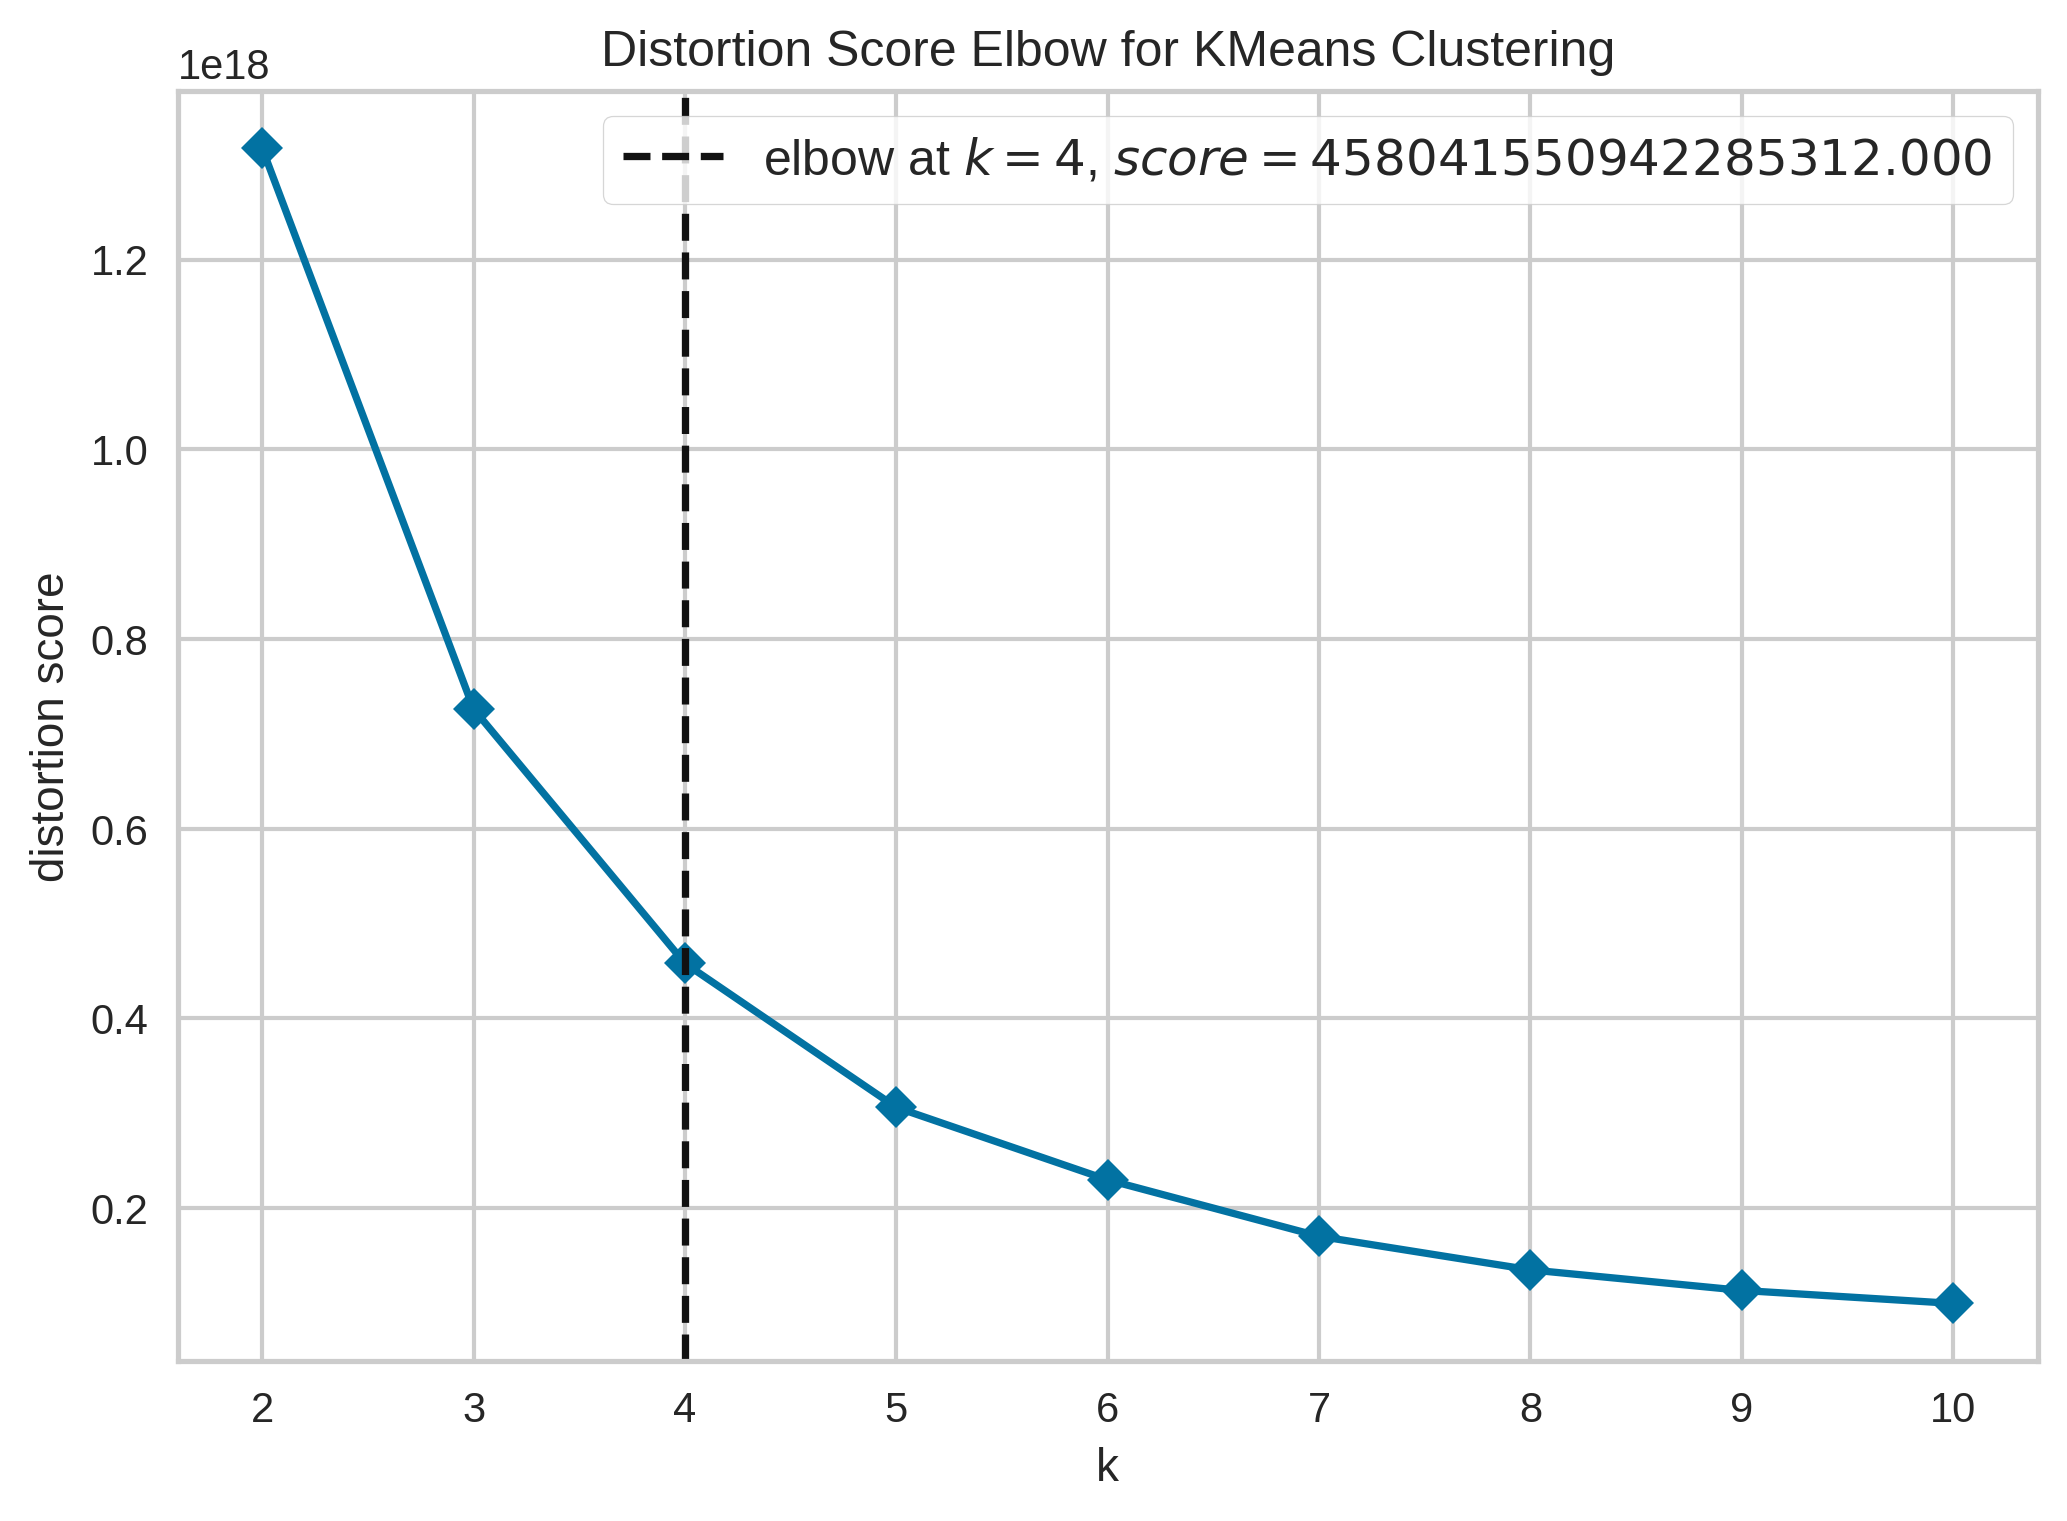

In [ ]:
cluster = setup(df, session_id = 7652)
model = create_model('kmeans')
plot_model(model, 'elbow')

In [ ]:
model = create_model('kmeans', num_clusters = 4)
plot_model(model,  plot = 'distribution')
plot_model(model, 'cluster')
save_model(model, 'Region1-Clusters')
rg1_results = assign_model(model)
rg1_results.head(10)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6990,9670.7545,0.5602,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,...,Distance_to_Nearest_RHU_km,population_children_under5,population_elder60plus,population_women,population_youth,population_reproductive_women,popden_all_total_population,Neighbors,HCFAI,Cluster
0,2865422,Ilio-ilio (Iliw-iliw),Burgos,Pangasinan,0.934144,1.178482,0.740358,1.0,0,0,...,29.847534,0.000000,0.000000,0.00000,0.000000,0.000000,4.064488e+05,"2944105, 2944105, 2945487, 2944106, 2945487, 2...",0.500010,Cluster 0
1,2866789,Macaboboni,Agno,Pangasinan,0.734487,1.099466,0.749863,1.0,0,0,...,11.042224,14927.853516,7242.223145,53306.71875,19756.001953,26209.955078,1.697446e+06,"2944105, 2945487, 2944106, 2945487, 2944107, 2...",0.500016,Cluster 0
2,2866790,Macaboboni,Agno,Pangasinan,0.734487,1.099466,0.749863,0.0,0,0,...,11.392127,0.000000,0.000000,0.00000,0.000000,0.000000,2.819701e+06,"2942723, 2942723, 2941342, 2942722, 2941341, 2...",0.499935,Cluster 0
3,2866791,Macaboboni,Agno,Pangasinan,0.734487,1.099466,0.749863,0.0,0,0,...,12.122822,0.000000,0.000000,0.00000,0.000000,0.000000,4.244968e+06,"2956481, 2956481, 2956481, 2956481, 2956481, 2...",0.499960,Cluster 0
4,2866795,Aloleng,Agno,Pangasinan,1.089602,1.154037,0.779155,0.0,0,0,...,15.836811,105878.718750,69201.750000,415210.62500,144285.703125,194110.968750,7.493846e+05,"2956481, 2956481, 2956481, 2956481, 2957864, 2...",0.499835,Cluster 0
5,2866796,Magsaysay,Agno,Pangasinan,0.700863,1.151206,0.800627,0.0,0,0,...,16.685263,0.000000,0.000000,0.00000,0.000000,0.000000,4.021250e+03,"2956481, 2956481, 2956481, 2957864, 2956482, 2...",0.467737,Cluster 0
6,2866797,Tupa,Agno,Pangasinan,0.952087,1.147433,0.793311,1.0,0,0,...,18.265360,0.000000,0.000000,0.00000,0.000000,0.000000,1.469673e+05,"2971765, 2971764, 2971766, 2970382, 2970383, 2...",0.499971,Cluster 0
7,2866798,Gayusan,Agno,Pangasinan,0.853295,1.143231,0.787825,1.0,0,0,...,20.012033,119328.359375,152214.093750,540266.06250,167247.546875,236777.453125,1.637830e+06,"2971764, 2970382, 2970381, 2971764, 2970381, 2...",0.500001,Cluster 0
8,2866799,Gayusan,Agno,Pangasinan,0.853295,1.143231,0.787825,0.0,0,0,...,21.284109,0.000000,0.000000,0.00000,0.000000,0.000000,3.716372e+06,"2971766, 2971767, 2970383, 2970384",0.499971,Cluster 0
9,2866800,Baruan,Agno,Pangasinan,0.926651,1.173055,0.762978,0.0,0,0,...,22.080393,0.000000,0.000000,0.00000,0.000000,0.000000,8.700532e+05,"2971767, 2971768, 2970384, 2970385",0.499882,Cluster 0


In [ ]:
rg1_results.rename(columns = {'Cluster':'Accessibility Level'}, inplace = True)
low = []
midlow = []
midhigh = []
high = []

for x in range(5729):
    if rg1_results['Accessibility Level'][x] == "Cluster 0":
        midlow.append(rg1_results["HCFAI"][x])
    elif rg1_results['Accessibility Level'][x] == "Cluster 1":
        low.append(rg1_results["HCFAI"][x])
    elif rg1_results['Accessibility Level'][x] == "Cluster 2":
        high.append(rg1_results["HCFAI"][x])
    elif rg1_results['Accessibility Level'][x] == "Cluster 3":
        midhigh.append(rg1_results["HCFAI"][x])

KeyError: 4701

In [ ]:
print(f'CLUSTER 1 - Max: {max(low)} min: {min(low)} total number: {len(low)}')
print(f'CLUSTER 0 - Max: {max(midlow)} min: {min(midlow)} total number: {len(midlow)}')
print(f'CLUSTER 2 - Max: {max(high)} min: {min(high)} total number: {len(high)}')
print(f'CLUSTER 3 - Max: {max(midhigh)} min: {min(midhigh)} total number: {len(midhigh)}')

In [ ]:
mid_to_high = []
for i in list(df['HCFAI']):
    if i >= 0.53:
        mid_to_high.append(i)

# Assuming original_df is your original DataFrame
filtered_original_df = df[df['HCFAI'].isin(mid_to_high)]
print(filtered_original_df)